<a href="https://colab.research.google.com/github/lindseyhuppin/Neur265Work/blob/main/notebooks/ERPs_03_18_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Continuously Sampled Data

In this notebook (and our next few notebooks), you will learn the basics of working with continuously sampled data - specifically, EEG (electroencephalogram) and LFP (local field potential) data.

##By the end of this notebook, you will be able to:

- Plot continuously sampled data (brainwaves)
- Identify attributes of these data (amplitude, frequency, phase)
- Average signals across "events" to create an event-related potential (ERP)
- Interpret the ERP in the context of behavior

##Different components of a continuously-sampled signal

<img src = 'https://drive.google.com/uc?id=1__JK1ElA4y49QWLCpnF9dGghWiQzAzcG'>

- The **amplitude** of a signal refers to its height (value along the y-axis). Another word often used interchangeably with amplitude is **power** (amplitude<sup>2</sup>).
- The **frequency** of a signal refers to the number of cycles (from *peak* to *peak*) per second (measured in Hz).
- The **phase** of a signal refers to its position within a cycle. When thinking about phase, it's useful to think of each cycle as a circle, with each part of the signal falling somewhere along the diameter of that circle.

In [1]:
# Let's start by importing relevant modules

import numpy as np
import matplotlib.pyplot as plt

In this notebook, we'll work with publicly available EEG data from undergraduate students at a university.

In this study, EEG electrodes (sampling rate 500 Hz, i.e., 500 samples per second) are placed on the student’s scalp, and he is seated in a comfortable chair in a dark, electrically isolated room. The student is instructed to place headphones over his ears and listen to a series of repeated sounds. The sounds consist of two tones - either a high pitch tone or a low pitch tone. A single tone is presented once every few seconds, and the student responds with a button press to the low pitch tone. The tone presentation is repeated to collect the EEG response to numerous presentations of the two tones, as illustrated here:

<img src = 'https://drive.google.com/uc?id=1I0EJ2xdEbDgLUnRv_RIQXaU8_l2QViEA'>

In this cartoon illustration of the EEG experiment, the EEG electrodes are placed on the scalp surface of a human subject (left). The EEG activity (blue) is recorded as a function of time during presentation of high pitch tones (black) and low pitch tones (orange).

Our firs step is to load the data in as <code>numpy</code> arrays. Do this by running the code cell below:

In [4]:
# Load in the EEG signal surrounding high-pitch tones, the EEG signal surrounding low-pitch tones, and the time scale for each trial

url1 = 'https://raw.githubusercontent.com/hallockh/neur_265/main/data/eega.csv'
url2 = 'https://raw.githubusercontent.com/hallockh/neur_265/main/data/eegb.csv'
url3 = 'https://raw.githubusercontent.com/hallockh/neur_265/main/data/t.csv'

EEGa = np.loadtxt(url1, delimiter = ',')
EEGb = np.loadtxt(url2, delimiter = ',')
time = np.loadtxt(url3, delimiter = ',')


><b>Task:</b> Print the shape of each one of the three variables you imported

In [7]:
# Your code here!
print(EEGa.shape)
print(EEGb.shape)
print(time.shape)

(1000, 500)
(1000, 500)
(500,)


We see that the shape for both `EEGa` and `EEGb` is 1000x500. Both variables are matrices with 1000 rows and 500 columns. We know that:

Each row corresponds to a separate trial, and

Each column to a point in time.

So there are 1000 total trials, each consisting of 500 time points. As a matter of convenience, we define a new variable to record the number of trials:

In [19]:
ntrials = EEGa.shape[0]
print(ntrials)

1000


Question: What is the size of your <code>ntrials</code> variable? Why did the above code return this value?

We can actually assign two variables at the same time with the <code>shape</code> function:

In [27]:
ntrials, nsamples = EEGa.shape

With this syntax:

we assign the variable `ntrials` to the value `EEGa.shape[0]`, which is the number of rows.

we assign the variable `nsamples` to the value `EEGa.shape[1]`, which is the number of columns.

Both `EEGb` and `EEGa` are complicated variables that contain many elements. To understand these data, we might attempt to read the values contained in each element. To do this, try printing out the data for the first trial of <code>EEGa</code>.

In [28]:
# Your code here!
print(EEGa[0])

[-1.85909632e-01  4.49876010e-01  1.06070801e+00 -4.71265246e-01
  1.68669326e+00  9.38221338e-01  2.21207038e-01  4.05491276e-01
  8.78879665e-01  5.23697825e-01 -2.35240678e+00 -9.24345879e-01
  7.66671797e-01 -4.64254999e-01  6.25953180e-02  1.51917029e+00
 -7.76400815e-01  8.14988739e-01 -1.58137285e-01 -6.17402518e-01
  2.07506393e-01  3.59430871e-01 -1.21455008e+00 -6.16715452e-01
 -4.81362030e-02  3.17982689e-01 -2.77459585e-01  4.14839810e-02
 -1.52257779e+00  1.31993666e+00  1.46836023e+00  1.84666100e+00
  5.23163980e-02  2.05515379e-01  2.27994679e-01 -1.34063464e+00
  5.61451651e-01  1.20391968e+00  1.06398658e+00  4.38748238e-01
  1.64443735e+00 -1.54713823e+00  6.41177787e-01 -1.13319311e+00
  1.06869889e+00  3.88678297e-01 -1.86251056e+00 -1.14074604e+00
 -4.59323117e-01  7.46220184e-01  4.40752835e-01 -7.05129357e-01
 -1.85879610e-01 -4.52021190e-02 -7.74389189e-01  1.55051475e+00
  1.12600754e+00 -1.14703552e+00 -5.42577410e-02  8.27809465e-01
  8.56502531e-01 -1.14366

What do you find? Does this help you understand the data?

What happens if we plot the first trial?

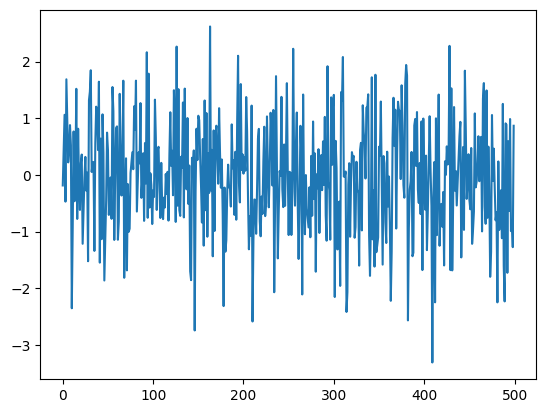

In [31]:
# Plotting the first trial of EEGa

plt.plot(EEGa[0])

Question: What is plotted on the x-axis? Why does the x-axis go from 0 to 500?

It would be more informative to plot the EEG data as a function of time rather than indices. Fortunately, we possess a variable `time` in the workspace that corresponds to the time axis. Determining the size of the variable `time`, we find it is a vector with 1 row and 500 columns. Each column corresponds to a point in time.

><b>Task:</b> Plot the <code>time</code> variable in the code cell below. Does the plot output make sense? What is being plotted? You can find the range of <code>time</code> by using the <code>np.ptp</code> method. What is its range?

0.998

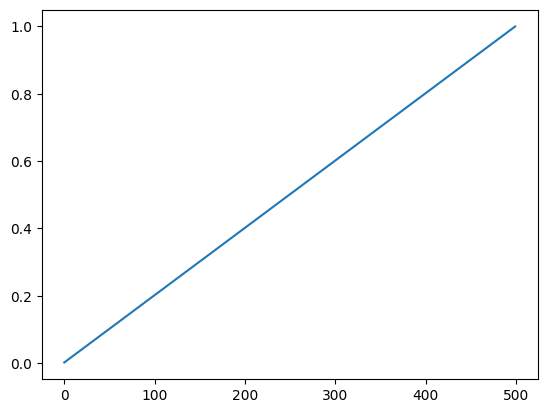

In [33]:
# Your code here!
plt.plot(time)
np.ptp(time)

Based on the results above: What do you think the units of <code>time</code> are?

We can use the variable <code>time</code> to determine the **sampling interval**, or the amount of time in between samples:

In [36]:
dt = time[1] - time[0]  # Determine the sampling interval

><b>Task:</b> Print the value of <code>dt</code> below. We know that the sampling frequency for our data is 500 Hz. Is the value of <code>dt</code> consistent with that sampling frequency? Write a mathematical expression to prove that the two values line up.

In [43]:
# Your code here!
print(dt)
print(np.ptp(time)/dt) #proving sampling rate is 500 Hz

0.002
499.0


We can now combine the time axis with the EEG data to make a more complete plot. Let’s also label the axes and give the plot a title.

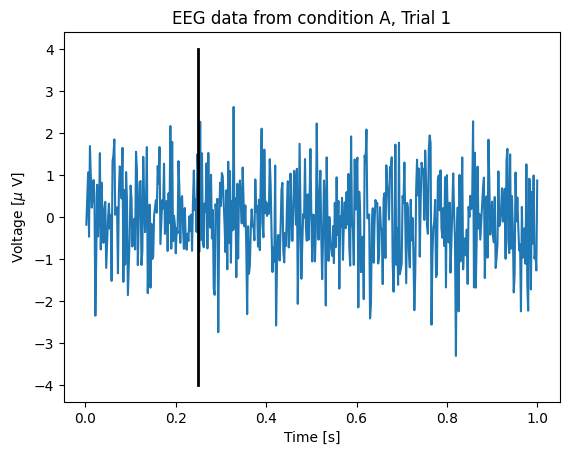

In [44]:
plt.plot(time, EEGa[0])                     # Plot condition A, trial 1 data vs t.
plt.xlabel('Time [s]')                   # Label the x-axis as time.
plt.ylabel('Voltage [$\mu$ V]')          # Label the y-axis as voltage.
plt.title('EEG data from condition A, Trial 1')  # Add a title

# Add a vertical line to indicate the stimulus time
plt.plot([0.25, 0.25], [-4,4], 'k', lw=2)


This plot provides a nice summary of the data in the first trial of condition A (high-pitch tones). Visual inspection of the plot suggests that these data exhibit complicated activity. We know that the stimulus occurs at time 0.25 s in each trial. Note how we indicated this time as a vertical line in the plot above. This command includes additional options that make the line black (`'k'`) and a bit wider (`lw=2`).

Question: What else, if anything, can you say about the single trial of EEG data plotted above? Does the visual inspection reveal any particular change in the EEG activity following the stimulus presentation?

So far we have visualized only the data from condition A. Because we are interested in whether the EEG behaves differently in the two conditions, visualizing both conditions simultaneously would be of use. We can do this as follows:

Text(0.5, 1.0, 'EEG data from conditions A (blue) and B (red), Trial 1')

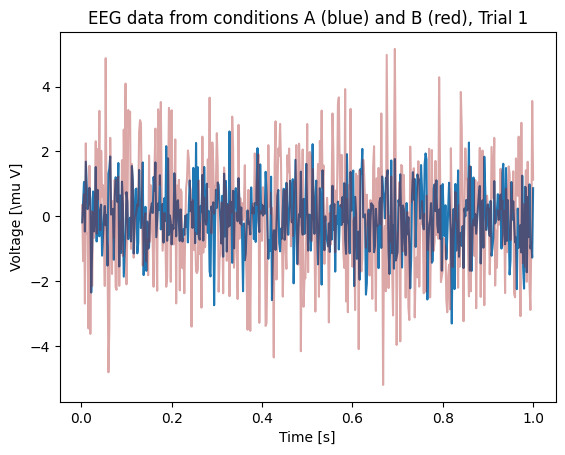

In [46]:
plt.figsize=(12, 3)     # Resize the figure to make it easier to see
plt.plot(time,EEGa[0])                 # Plot condition A, trial 1, data vs t,
plt.plot(time,EEGb[0], '#9f0a0a5b')            # ... and the data from condition B, trial 1,
plt.xlabel('Time [s]')              # Label the x-axis as time.
plt.ylabel('Voltage [\mu V]')       # Label the y-axis as voltage.
plt.title('EEG data from conditions A (blue) and B (red), Trial 1') # And give it a title.


><b>Task:</b> Repeat this visual inspection for the first four trials. Plot each trial in a new subplot. Do this manually first, and then create a <code>for</code> loop that does it for you!

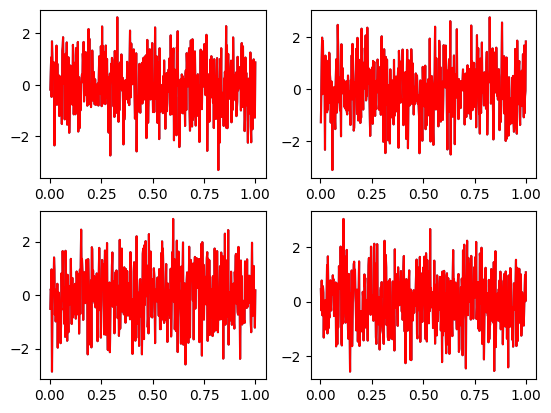

In [55]:
# Your code here!
fig,ax = plt.subplots(2,2)
ax[0,0].plot(time,EEGa[0])
ax[0,1].plot(time,EEGa[1])
ax[1,0].plot(time,EEGa[2])
ax[1,1].plot(time,EEGa[3])
ax[0,0].plot(time,EEGa[0],'r')
ax[0,1].plot(time,EEGa[1],'r')
ax[1,0].plot(time,EEGa[2],'r')
ax[1,1].plot(time,EEGa[3],'r')

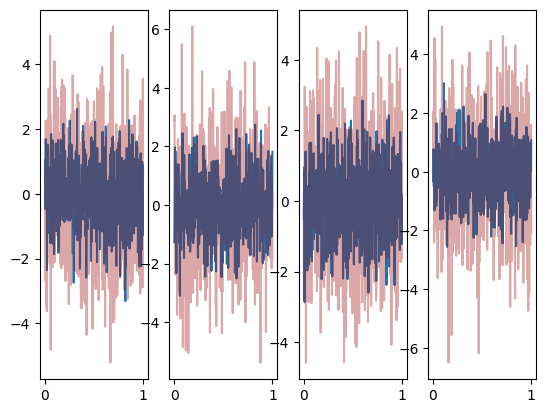

In [56]:
fig,ax = plt.subplots(1,4)
for i in range(4):
  ax[i].plot(time,EEGa[i])
  ax[i].plot(time,EEGb[i],'#9f0a0a5b')

These techniques allow us to visualize the data one trial at a time. That is useful but can be time consuming, especially for a large number of trials. For the EEG data of interest here, each condition contains 1,000 trials, and to visualize each trial separately could require 2,000 plots. We can certainly create 2,000 plots, but the subsequent visual inspection would be time consuming and difficult. Fortunately, a more efficient visualization approach exists: we can display the entire structure of the data across both time and trials as an image:

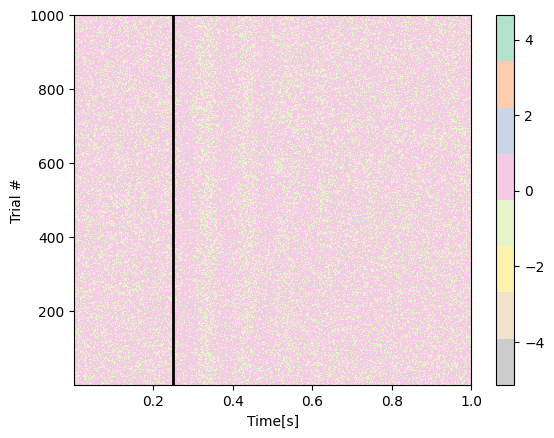

In [67]:
plt.imshow(EEGa,                                   # Image the data from condition A.
           cmap='Pastel2_r',                            # ... set the colormap (optional)
           extent=[time[0], time[-1], 1, ntrials],       # ... set axis limits (t[-1] represents the last element of t)
           aspect='auto',                          # ... set aspect ratio
           origin='lower')                         # ... put origin in lower left corner
plt.xlabel('Time[s]')                              # Label the axes
plt.ylabel('Trial #')
plt.colorbar()                                     # Show voltage to color mapping
plt.vlines(0.25, 1, 1000, 'k', lw=2)               # Indicate stimulus onset with line

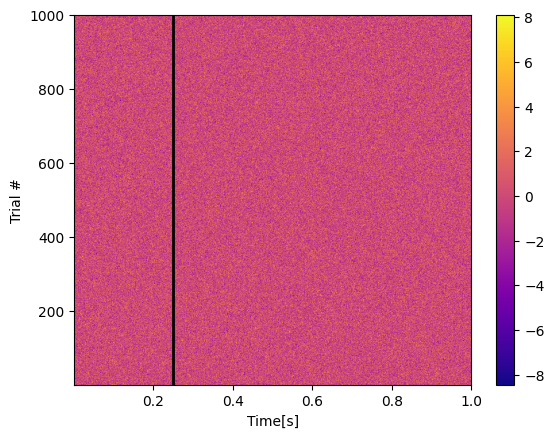

In [65]:
plt.imshow(EEGb,                                   # Image the data from condition A.
           cmap='plasma',                            # ... set the colormap (optional)
           extent=[time[0], time[-1], 1, ntrials],       # ... set axis limits (t[-1] represents the last element of t)
           aspect='auto',                          # ... set aspect ratio
           origin='lower')                         # ... put origin in lower left corner
plt.xlabel('Time[s]')                              # Label the axes
plt.ylabel('Trial #')
plt.colorbar()                                     # Show voltage to color mapping
plt.vlines(0.25, 1, 1000, 'k', lw=2)               # Indicate stimulus onset with line

The `imshow` command allows us to visualize the entire matrix EEGa as a function of trial number and time. Each row corresponds to a single trial of duration 1 s, and the color indicates the voltage, with darker (lighter) colors indicating higher (lower) voltages. This plot also indicates the time of stimulus presentation with a vertical black line as a cue to assist visual inspection.

><b>Task:</b> There are many other color options - to see them all, use <code>plt.colormaps?</code>. Re-run the code cell above to try some different options!

In [64]:
plt.colormaps?

Question: Upon close inspection of the figure above, what response, if any, do you observe following the stimulus presentation? (Look really carefully.) Repeat this visualization and analysis for `EEGb`. How do the two conditions compare?

Visual inspection of the EEG data has so far come up empty. The EEG traces appear noisy or perhaps rhythmic, but from visual inspection of the individual trials it’s difficult to make a decisive conclusion of underlying structurefig. To further investigate the activity in these data, we compute the event-related potential (ERP).

To compute the ERP, we first assume that each trial evokes an instantiation of the same underlying brain process. So, in this case, we assume that the same brain response is evoked 1,000 times (once for each trial) for each condition. However, the evoked response due to the stimulus is small and hidden in the EEG signal by other ongoing activity unrelated to the stimulus (e.g., daydreaming, thoughts of dinner, thoughts of homework). Therefore, to tease out the weak evoked effect, we average the EEG responses across trials. Ideally, EEG activity unrelated to the stimulus will cancel out in the average, while EEG activity evoked by the stimulus will sum constructively. The procedure to perform and display this averaging can be done in Python as follows:

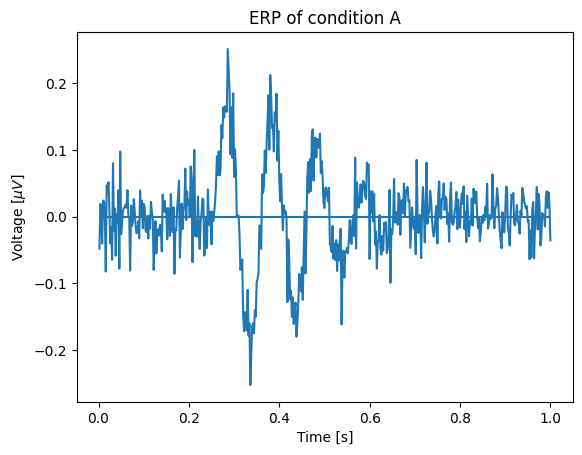

In [88]:
plt.plot(time, EEGa.mean(0))        # Plot the ERP of condition A
plt.xlabel('Time [s]')           # Label the axes
plt.ylabel('Voltage [$\mu V$]')
plt.title('ERP of condition A')  # ... provide a title



In the first line, we compute the mean of `EEGa` using the method `mean()` (see the documentation for this function [here]('https://numpy.org/doc/stable/reference/generated/numpy.mean.html')). The default behavior is to compute the mean of all elements of the array. By calling EEG.mean(0), we compute the mean along the zeroth dimension. The result is the ERP for condition A.

><b>Task:</b> Consider the ERP for condition A plotted above. Update this figure to include a vertical line at the location of the stimulus, and the ERP for condition B. How, if at all, do the ERPs for Conditions A and B differ?

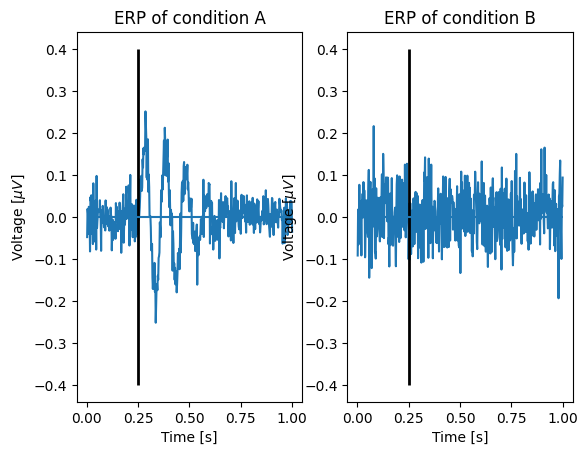

In [90]:
fig,ax = plt.subplots(1,2)
ax[0].plot(time, EEGa.mean(0))
ax[1].plot(time, EEGb.mean(0))
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Time [s]')
ax[0].set_ylabel('Voltage [$\mu V$]')
ax[1].set_ylabel('Voltage [$\mu V$]')
ax[0].set_title('ERP of condition A')
ax[1].set_title('ERP of condition B')
ax[0].vlines(0.25, -.4, .4, 'k', lw=2)
ax[1].vlines(0.25, -.4, .4, 'k', lw=2)
ax[0].hlines(0, time[0], time[-1])
ax[1].hlines(0, time[0], time[-1])

><b>Task:</b> Add the following line of code to your code cell above: <code>plt.hlines(0, time[0], time[-1])</code>. Run the code cell below. What does it do to your plot? Why would you want this in your plot? Based on this change in your plot, do you think that there is indeed some kind of change in the EEG that happens consistently during stimulus presentation?